<a href="https://colab.research.google.com/github/nayrr25/Aplicaciones-Financieras-e-IA/blob/main/Examen_2_semana8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediccion con LSTM de los tipos de cambio

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana7/1_Manejo_de_portafolios_Markovitz.ipynb)

In [1]:

!pip install yfinance


In [2]:
#Paquetes
import yfinance as yf
import pandas as pd

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers

import plotly.graph_objects as go

In [5]:
def evaluate_model(estimator, train, val, test):
    print('train cross_entropy = ', estimator.evaluate(train[0], train[1], verbose = False))
    print('  val cross_entropy = ', estimator.evaluate(val[0], val[1], verbose = False))
    print(' test cross_entropy = ', estimator.evaluate(test[0], test[1], verbose = False))

In [6]:

# Define el símbolo del par de divisas para el dólar en pesos mexicanos
symbol = 'USDMXN=X'

# Descarga los datos históricos
df = yf.download(symbol, period="1y", interval = "1d",)
data=df.copy()

[*********************100%%**********************]  1 of 1 completed


In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-25,19.902599,19.957821,19.837099,19.902599,19.902599,0
2022-08-26,19.919100,19.969419,19.858200,19.919100,19.919100,0
2022-08-29,20.067801,20.145269,19.964100,20.067801,20.067801,0
2022-08-30,19.984800,20.140301,19.898600,19.984800,19.984800,0
2022-08-31,20.127300,20.236879,20.070299,20.127300,20.127300,0
...,...,...,...,...,...,...
2023-08-21,17.026100,17.076651,17.003799,17.026100,17.026100,0
2023-08-22,17.012800,17.027100,16.882601,17.012800,17.012800,0
2023-08-23,16.906450,16.909710,16.786301,16.906450,16.906450,0


In [8]:
data= pd.DataFrame(data)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-25,19.902599,19.957821,19.837099,19.902599,19.902599,0
2022-08-26,19.919100,19.969419,19.858200,19.919100,19.919100,0
2022-08-29,20.067801,20.145269,19.964100,20.067801,20.067801,0
2022-08-30,19.984800,20.140301,19.898600,19.984800,19.984800,0
2022-08-31,20.127300,20.236879,20.070299,20.127300,20.127300,0
...,...,...,...,...,...,...
2023-08-21,17.026100,17.076651,17.003799,17.026100,17.026100,0
2023-08-22,17.012800,17.027100,16.882601,17.012800,17.012800,0
2023-08-23,16.906450,16.909710,16.786301,16.906450,16.906450,0


# Primer experimento LSTM

In [9]:
 #Cargar tus datos de serie de tiempo
# Por ejemplo, asumiendo que tienes un DataFrame llamado 'data' con una columna 'precio_dolar_mxn'

# Preprocesar los datos
data = data[['Adj Close']]  # Seleccione la columna de interés
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data[['Adj Close']])



<ipython-input-9-aabb4fe2a836>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Adj Close'] = scaler.fit_transform(data[['Adj Close']])


In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

In [11]:
# Crear secuencias de tiempo para entrenamiento y prueba
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i+seq_length].values
        sequences.append(seq)
    return np.array(sequences)

seq_length = 3  # Longitud de la secuencia de tiempo
X_train = create_sequences(train_data, seq_length)
y_train = train_data.iloc[seq_length:].values
X_test = create_sequences(test_data, seq_length)
y_test = test_data.iloc[seq_length:].values



In [12]:
# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')



In [13]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=101, batch_size=100)

Epoch 1/101
3/3 [==============================] - 4s 16ms/step - loss: 0.3939
Epoch 2/101
3/3 [==============================] - 0s 11ms/step - loss: 0.3691
Epoch 3/101
3/3 [==============================] - 0s 11ms/step - loss: 0.3455
Epoch 4/101
3/3 [==============================] - 0s 15ms/step - loss: 0.3218
Epoch 5/101
3/3 [==============================] - 0s 9ms/step - loss: 0.2984
Epoch 6/101
3/3 [==============================] - 0s 10ms/step - loss: 0.2752
Epoch 7/101
3/3 [==============================] - 0s 10ms/step - loss: 0.2523
Epoch 8/101
3/3 [==============================] - 0s 9ms/step - loss: 0.2300
Epoch 9/101
3/3 [==============================] - 0s 8ms/step - loss: 0.2074
Epoch 10/101
3/3 [==============================] - 0s 11ms/step - loss: 0.1855
Epoch 11/101
3/3 [==============================] - 0s 7ms/step - loss: 0.1639
Epoch 12/101
3/3 [==============================] - 0s 9ms/step - loss: 0.1423
Epoch 13/101
3/3 [==============================] - 0s

In [14]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Loss en el conjunto de prueba: {test_loss}')

2/2 [==============================] - 0s 7ms/step - loss: 0.0044
Loss en el conjunto de prueba: 0.004359676036983728


In [15]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


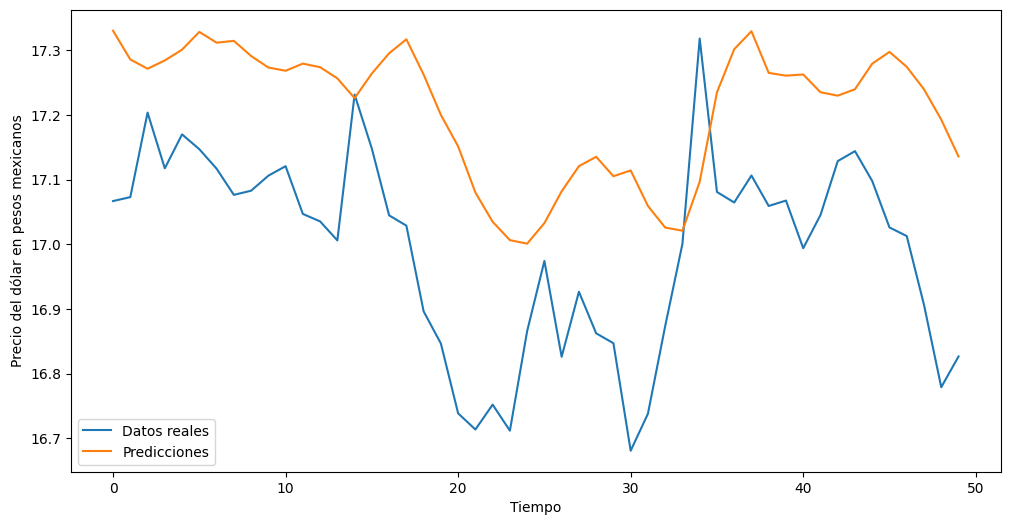

In [16]:
# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test), label='Datos reales')
plt.plot(scaler.inverse_transform(predictions), label='Predicciones')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Precio del dólar en pesos mexicanos')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

# Entrenar el modelo (asumiendo que ya lo has entrenado)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


2/2 [==============================] - 0s 6ms/step
Mean Squared Error (MSE): 0.0043596759222783365


# Segundo experimento

In [18]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-25,19.902599,19.957821,19.837099,19.902599,19.902599,0
2022-08-26,19.919100,19.969419,19.858200,19.919100,19.919100,0
2022-08-29,20.067801,20.145269,19.964100,20.067801,20.067801,0
2022-08-30,19.984800,20.140301,19.898600,19.984800,19.984800,0
2022-08-31,20.127300,20.236879,20.070299,20.127300,20.127300,0
...,...,...,...,...,...,...
2023-08-21,17.026100,17.076651,17.003799,17.026100,17.026100,0
2023-08-22,17.012800,17.027100,16.882601,17.012800,17.012800,0
2023-08-23,16.906450,16.909710,16.786301,16.906450,16.906450,0


In [19]:
# Cargar los datos históricos
symbol = 'USDMXN=X'
df = yf.download(symbol, period="1y", interval="1d")

# Seleccionar la columna de interés (Precio de cierre ajustado)
data = df[['Adj Close']]

# Normalizar los datos entre 0 y 1
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data[['Adj Close']])

[*********************100%%**********************]  1 of 1 completed


<ipython-input-19-1e50fb5cda64>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Adj Close'] = scaler.fit_transform(data[['Adj Close']])


## Transformación y División

In [20]:
# Supongamos que 'data' contiene tus datos preprocesados de tipo de cambio
# Define la longitud de la secuencia de tiempo
seq_length = 3  # Puedes ajustar esto según tus necesidades

# Crear secuencias de tiempo para entrenamiento
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)
        y.append(data.iloc[i+seq_length].values)
    return np.array(X), np.array(y)

X, y = create_sequences(data, seq_length)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Supongamos que 'data' contiene tus datos preprocesados de tipo de cambio

# División de datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, random_state=10, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, random_state=10, shuffle=False)

# Ahora tienes X_train, y_train para entrenamiento
# X_val, y_val para validación
# X_test, y_test para pruebas

## Redes Neuronales

In [22]:
earlystop_cb = keras.callbacks.EarlyStopping(
    patience = 25,
    restore_best_weights = True
)

In [23]:
# Define la dimensión de fusión
fusion_dim = 8

# Definición de la entrada de precio
price_input = layers.Input(shape=(seq_length, 1), name='price_input')  # La entrada es una secuencia de longitud seq_length

# Definición de la capa LSTM
lstm_layer = layers.LSTM(fusion_dim, name='lstm')(price_input)

# Definición de la capa de predicción
prediction_layer = keras.models.Sequential([
    layers.Dense(8, activation='tanh'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(1, activation='linear')  # Se ajusta a la regresión, si es clasificación, cambia la activación y la dimensión de salida
], name='prediction')

# Salida de predicción
prediction_output = prediction_layer(lstm_layer)

# Creación del modelo
model = keras.Model(inputs=[price_input], outputs=prediction_output)

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')  # Cambié la pérdida a 'mean_squared_error' para la regresión

# Resumen del modelo
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 price_input (InputLayer)    [(None, 3, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 prediction (Sequential)     (None, 1)                 225       
                                                                 
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_2 = keras.Model([price_input], prediction_output)

model_2.compile(
    loss = 'categorical_crossentropy'
)

model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 price_input (InputLayer)    [(None, 3, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 prediction (Sequential)     (None, 1)                 225       
                                                                 
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


# Visualization

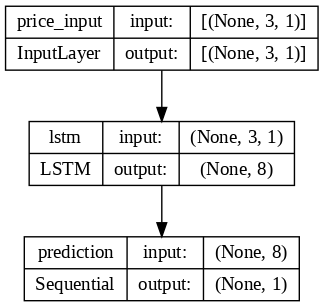

In [25]:
# Visualización del modelo
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TD",
    dpi=100,
)

In [26]:
history = model.fit(
    X_train, y_train,
    batch_size = 100,
    epochs = 100,  # Valor real de 1000
    callbacks = [earlystop_cb],
    validation_data = [X_val, y_val]
).history

Epoch 1/100
3/3 [==============================] - 7s 553ms/step - loss: 0.8416 - val_loss: 0.1330
Epoch 2/100
3/3 [==============================] - 0s 63ms/step - loss: 0.8077 - val_loss: 0.1194
Epoch 3/100
3/3 [==============================] - 0s 52ms/step - loss: 0.7731 - val_loss: 0.1064
Epoch 4/100
3/3 [==============================] - 0s 75ms/step - loss: 0.7387 - val_loss: 0.0939
Epoch 5/100
3/3 [==============================] - 0s 37ms/step - loss: 0.7042 - val_loss: 0.0821
Epoch 6/100
3/3 [==============================] - 0s 39ms/step - loss: 0.6703 - val_loss: 0.0709
Epoch 7/100
3/3 [==============================] - 0s 40ms/step - loss: 0.6362 - val_loss: 0.0604
Epoch 8/100
3/3 [==============================] - 0s 65ms/step - loss: 0.6027 - val_loss: 0.0507
Epoch 9/100
3/3 [==============================] - 0s 95ms/step - loss: 0.5695 - val_loss: 0.0418
Epoch 10/100
3/3 [==============================] - 0s 62ms/step - loss: 0.5366 - val_loss: 0.0336
Epoch 11/100
3/3 [

In [27]:
x = list(range(len(history['loss'])))

fig = go.Figure()

fig.add_trace(go.Scatter(x = x, y = history['loss'])) \
   .add_trace(go.Scatter(x = x, y = history['val_loss']))

fig.show()

In [28]:
evaluate_model(model, [X_train, y_train], [X_val, y_val], [X_test, y_test])

train cross_entropy =  0.27322688698768616
  val cross_entropy =  0.0014823811361566186
 test cross_entropy =  0.0016040571499615908


In [29]:
model.save('best_model.h5')

In [30]:
best_model = keras.models.load_model('best_model.h5')
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 price_input (InputLayer)    [(None, 3, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 prediction (Sequential)     (None, 1)                 225       
                                                                 
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [31]:
from sklearn.metrics import mean_squared_error
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

1/1 [==============================] - 1s 762ms/step
Mean Squared Error (MSE): 0.0016040567707956246


# Experimento ARIMA

In [32]:
#Paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [33]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-25,19.902599,19.957821,19.837099,19.902599,19.902599,0
2022-08-26,19.919100,19.969419,19.858200,19.919100,19.919100,0
2022-08-29,20.067801,20.145269,19.964100,20.067801,20.067801,0
2022-08-30,19.984800,20.140301,19.898600,19.984800,19.984800,0
2022-08-31,20.127300,20.236879,20.070299,20.127300,20.127300,0
...,...,...,...,...,...,...
2023-08-21,17.026100,17.076651,17.003799,17.026100,17.026100,0
2023-08-22,17.012800,17.027100,16.882601,17.012800,17.012800,0
2023-08-23,16.906450,16.909710,16.786301,16.906450,16.906450,0


In [34]:
df["Close"]

Date
2022-08-25    19.902599
2022-08-26    19.919100
2022-08-29    20.067801
2022-08-30    19.984800
2022-08-31    20.127300
                ...    
2023-08-21    17.026100
2023-08-22    17.012800
2023-08-23    16.906450
2023-08-24    16.779100
2023-08-25    16.823200
Name: Close, Length: 262, dtype: float64

In [35]:
data=df.copy()

In [36]:
# Cargar tus datos de serie de tiempo
# Por ejemplo, asumiendo que tienes un DataFrame llamado 'data' con una columna 'precio_dolar_mxn'

# Preprocesar los datos (si es necesario)
data = data[['Close']]

In [37]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]



In [38]:
# Ajustar un modelo ARIMA
order = (1, 1, 1)  # Parámetros ARIMA (p, d, q)
model = ARIMA(train_data, order=order)
model_fit = model.fit()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



In [39]:
# Realizar predicciones
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



In [40]:
# Evaluar el modelo
test_values = test_data['Close'].values
mse = mean_squared_error(test_values, predictions)
rmse = np.sqrt(mse)
print(f'Error cuadrático medio (RMSE): {rmse}')



Error cuadrático medio (RMSE): 0.3133858309089213


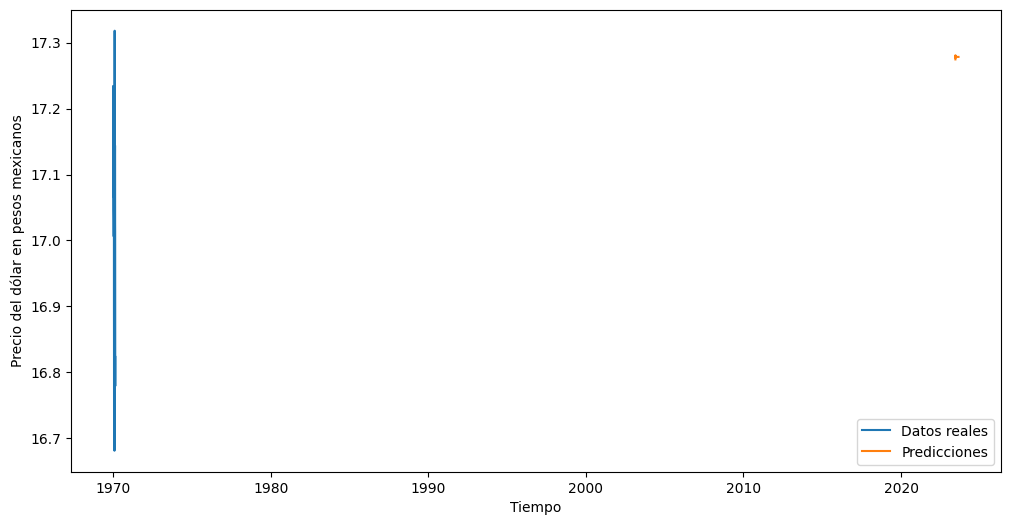

In [41]:
# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(test_values, label='Datos reales')
plt.plot(predictions, label='Predicciones')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Precio del dólar en pesos mexicanos')
plt.show()

In [42]:
r

NameError: ignored

# Crear un portafolio de varias divisas

In [ ]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "USDMXN=X EURUSD=X JPYUSD=X GBPUSD=X AUDUSD=X",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "1y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        # group_by = 'ticker',
    ).loc[:, 'Adj Close']
data

In [ ]:
closing_prices=data.copy()
closing_prices

In [ ]:
closing_prices.shift()
#Sirve para desplazar un período +1 hacia adelante

In [ ]:
annual_returns = np.log(closing_prices / closing_prices.shift()) / (1 / 252) # Para anualizar los retornos, los días hábiles cuando se abre la plataforma son 252
annual_returns

In [ ]:
#la media de los retornos anuales
mean_returns = annual_returns.mean()
mean_returns

In [ ]:
#covarianza de los retornos anuales de diferentes acciones
cov_returns = annual_returns.cov()
cov_returns

In [ ]:
correlation_matrix = annual_returns.corr()
correlation_matrix

In [ ]:
mean_returns

# Markovitz

In [ ]:
#creo una cantidad de matrices de 6*6 con zeros
#los weights2 es una matriz que contiene solo unos en la diagonal y el resto zeros y tamb de tamaño 6*6
np.random.seed(1995)

#N = 10000
N = 6  ##seis muestras

k = annual_returns.shape[1]

weights = np.zeros((N, k))
returns = np.zeros(N)
volatilities = np.zeros(N)
sharpe_ratios = np.zeros(N)

weights2 = np.array([[1,0,0,0,0],
                     [0,1,0,0,0],
                     [0,0,1,0,0],
                     [0,0,0,1,0],
                     [0,0,0,0,1]])

weights2.shape

In [ ]:
weights2.shape

In [ ]:
k

In [ ]:
for i in range(N):
    w = np.random.random(k)
    w /= np.sum(w)

    #w = weights2[i]  ##
    #weights[i, :] = weights2[i]  ##

    weights[i, :] = w

    returns[i] = np.dot(mean_returns, w)

    volatilities[i] = np.sqrt(np.dot(w.T, np.dot(cov_returns, w))) # w.T @ cov_returns @ w

    sharpe_ratios[i] = returns[i] / volatilities[i]

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

px.scatter(x = volatilities, y = returns, color = sharpe_ratios,
           labels={
                     "x": "Volatilidad",
                     "y": "Retorno",
                     "color": "Razón de Sharpe"
                 }
           )
#plt.scatter(volatilities, returns, c = sharpe_ratios)

## Optimización de portafolio

In [ ]:
mu_star = .1

In [ ]:
import cvxopt as opt
G = opt.matrix(-np.concatenate([mean_returns.to_numpy().reshape(1, k),np.eye(k)]), tc = 'd')
h = opt.matrix(np.concatenate([np.array([-mu_star]).reshape((1, 1)), np.zeros((k, 1))]), tc = 'd')
q = opt.matrix(0.0, (k, 1))
A = opt.matrix(1.0, (1, k))
b = opt.matrix(1.0)
P = opt.matrix(2 * cov_returns.to_numpy(), tc = 'd')

In [ ]:
P, q, G, h, A, b

In [ ]:
results = opt.solvers.qp(P, q, G, h, A, b)
results